# Визуализация данных

Почему важно смотреть на данные?

![](https://alexanderdyakonov.files.wordpress.com/2017/11/d0bad180d0bed0bbd0b8d0ba_d183d182d0bad0b0.jpg)

Почему опасно смотреть только на цифры при анализе данных:

Ниже на рисунке все 4 набора данных имеют одинаковые средние и дисперсии по осям x и y! То есть по таким базовым статистическим величинам эти наборы данных кажутся одинаковыми. Но после визуализации мы понимаем, что это не так

![](https://d1jnx9ba8s6j9r.cloudfront.net/blog/wp-content/uploads/2018/01/Anscombes_quartet_2.png)

[Квартет Энскомба](https://ru.wikipedia.org/wiki/%D0%9A%D0%B2%D0%B0%D1%80%D1%82%D0%B5%D1%82_%D0%AD%D0%BD%D1%81%D0%BA%D0%BE%D0%BC%D0%B1%D0%B0)

# Matplotlib

## 1. Введение 

Matplotlib это python-библиотека для двумерной графики, созданная в 2003 году как альтернатива платному MATLAB'y. Проект оказался настолько успешным, что matplotlib является стандартом для двумерной графики в анализе данных на python. Используя matplotlib можно нарисовать очень сложные графики, поэтому порог входа у него высокий. Для простых графиков есть удобные обертки, но кастомизация требует понимания деталей.

Есть несколько пакетов для построения графиков. `matplotlib` - один из наиболее популярных. Если в `jupyter notebook` выполнить специальную `ipython` команду `%matplotlib inline`, то графики будут строиться в том же окне браузера. 

Есть другие варианты, в которых графики показываются в отдельных окнах. Это удобно для трёхмерных графиков - тогда их можно вертеть мышкой (в случае inline графиков это невозможно). 

Графики можно также сохранять в файлы, как в векторных форматах (`eps`, `pdf`, `svg`), так и в растровых (`png`, `jpg`; конечно, растровые форматы годятся только для размещения графиков на web-страницах). `matplotlib` позволяет строить двумерные графики практически всех нужных типов, с достаточно гибкой регулировкой их параметров; он также поддерживает основные типы трёхмерных графиков, но для серьёзной трёхмерной визуализации данных лучше пользоваться более мощными специализированными системами.

Некоторые функции отрисовки:

* `plt.scatter(x, y, params)` — нарисовать точки с координатами из $x$ по горизонтальной оси и из $y$ по вертикальной оси
* `plt.plot(x, y, params)` — нарисовать график по точкам с координатами из $x$ по горизонтальной оси и из $y$ по вертикальной оси. Точки будут соединятся в том порядке, в котором они указаны в этих массивах.
* `plt.fill_between(x, y1, y2, params)` — закрасить пространство между $y_1$ и $y_2$ по координатам из $x$.
*  `plt.pcolormesh(x1, x1, y, params)` — закрасить пространство в соответствии с интенсивностью $y$.
* `plt.contour(x1, x1, y, lines)` — нарисовать линии уровня. Затем нужно применить `plt.clabel`


Вспомогательные функции:

*    `plt.figure(figsize=(x, y))` — создать график размера $(x, y)$
*    `plt.show()` — показать график.
*    `plt.subplot(...)` — добавить подграфик
*    `plt.xlim(x_min, x_max)` — установить пределы графика по горизонтальной оси
*    `plt.ylim(y_min, y_max)` — установить пределы графика по вертикальной оси
*    `plt.title(name)` — установить имя графика
*    `plt.xlabel(name)` — установить название горизонтальной оси
*    `plt.ylabel(name)` — установить название вертикальной оси
*    `plt.legend(loc=...)` — сделать легенду в позиции loc
*    `plt.grid()` — добавить сетку на график
*    `plt.savefig(filename)` — сохранить график в файл

https://matplotlib.org/stable/gallery/index.html (англ.) — тысячи примеров

У функций в `matplotlib` много параметров.
Для того, чтобы посмотреть все параметры, можно воспользоваться справкой


In [ ]:
import matplotlib as mpl  # стандартный алиас для matplotlib

Matplotlib состоит из множетства модулей и классов. Рисование в matplotlib состоит из последовательного нанесения объектов на холст. Объекты образуют иерархическую структуру. Задача пользователя описать эту структуру, а рисованием займется сама библиотека.

Рисунок в matplotlib имеет следующую структуру. Есть объект рисунок(Figure), в нем есть холст(Canvas) на котором может быть 1 или несколько областей рисования (Axes). Области рисования содержат элементы рисунка (Artists). Обычные пользователи большую часть времени занимаются тем что работают с элементами рисунка располагая их в нужном порядке на областях рисования. Элементы рисунка (Artists) можно разделить на две большие группы

 - **Примитивы** - простейшие элементы рисунка, такие как линии, прямоугольники, текст, изображения и т.д.
 - **Контейнеры** - рисунок (Figure), область рисования (Axes), координатные оси (Axis), деления на осях (Ticks).  

Библиотека манипулирует очень простыми графическими примитивами (линия, точка, отрезок, многоугольник), что совершенно неудобоно для людей - они мыслят высокоуровневыми абстракциями. Поэтому в matplotlib есть две обертки pylab и pyplot. Первая считается неудачным экспериментом - не используйте ее. Мы будем работать с pyplot.

In [3]:
import matplotlib.pyplot as plt  # стандартный алиас для pyplot
import numpy as np  # стандартный алиас для numpy

Для того чтобы рисунки выводились в графический интерфейс надо вызвать [магическую команду](https://ipython.readthedocs.io/en/stable/interactive/magics.html) для jupyter 

In [ ]:
# (!) С какого-то релиза стала необязательной

# Достаточно вызвать один раз
%matplotlib inline
# Без параметра inline изображения будут выводиться не в jupyter notebook, а в отдельное окно 

Также нам очень пригодится библиотека numpy для работы с многомерными массивами. С ее помощью можно быстро поэлементно применять математические функции и генерировать массивы.

In [1]:
import warnings
warnings.filterwarnings("ignore")

[1 1 3 1 4 2 3 4 4 0 0 4 4 1 2 0 3 3 2 0]


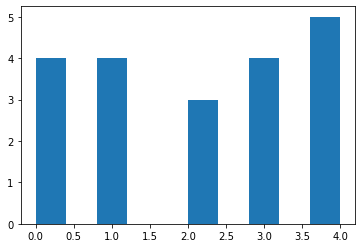

In [4]:
# создать рисунок гистограммы из 20 рандомных чисел в диапазоне от 0 до 5 невключительно

array = np.random.randint(low=0, high=5, size=20)
print(array)

plt.hist(array) 

# Сохранить ПОСЛЕДНИЙ созданный рисунок
plt.savefig('hist.png', fmt='png')
# показать ВСЕ созданные рисунки
plt.show()

При вызове этих команд произошло приблизительно следующее. Был создан рисунок (Figure). В нем была создана одна область рисования (Axes).  На эту область были помещены оси X и Y (Axis) и 10 синих прямоугольников (Rectangle) 5 из которых нулевой высоты. После этого у объекта рисунка вызвали методы savefig и show.

In [5]:
import warnings

import matplotlib.pyplot as plt
import numpy.random as npr
import scipy.stats as sps
from mpl_toolkits.mplot3d import Axes3D
from numpy.random import randn


warnings.simplefilter("ignore")

Посмотрим, что можно делать с библиотекой

## Основы matplotlib

Списки $x$ и $y$ координат точек. Точки соединяются прямыми, т.е. строится ломаная линия.

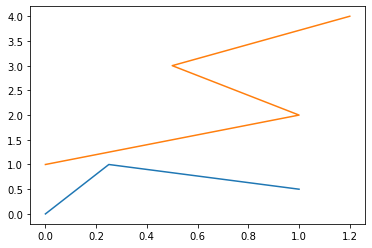

In [6]:
plt.plot([0, 0.25, 1], [0, 1, 0.5])
plt.plot([0, 1, 0.5, 1.2], [1, 2, 3, 4])
# plt.show()

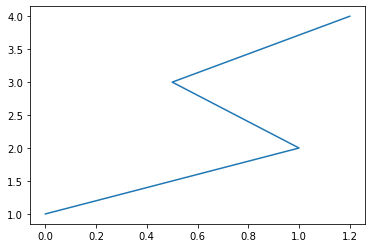

In [7]:
plt.figure()
plt.plot([0, 1, 0.5, 1.2], [1, 2, 3, 4])
plt.show()

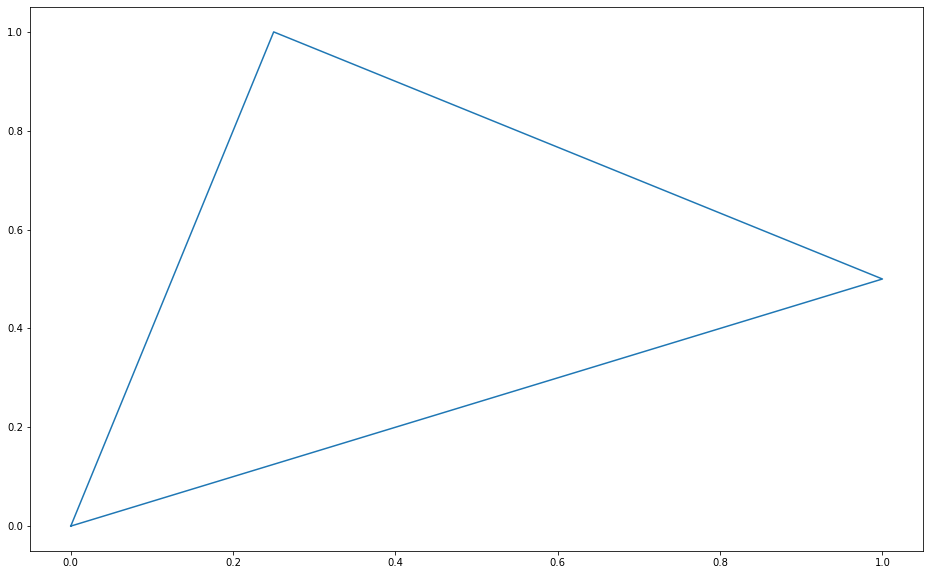

In [8]:
# можно задавать размер изображения
plt.figure(figsize=(16, 10))
plt.plot([0, 0.25, 1, 0], [0, 1, 0.5, 0])
plt.show()

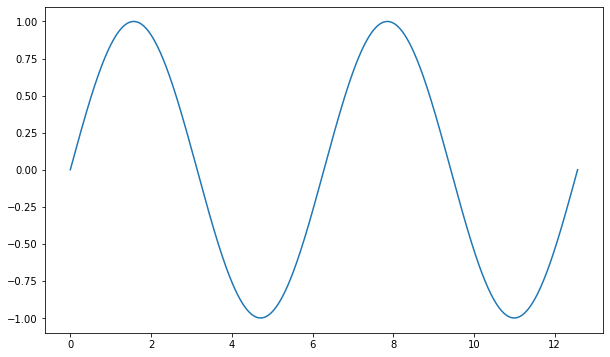

In [11]:
# тут мы создаем массив numpy встроенной функцией
# используем функцию из numpy, которая создает массив из 100 точек в диапазоне от 0 до 4 Pi с равными шагами
x = np.linspace(0, 4 * np.pi, 1000)

plt.figure(figsize=(10, 6))
plt.plot(x, np.sin(x))
plt.show()

Массив $x$ не обязан быть монотонно возрастающим. Можно строить любую параметрическую линию $x=x(t)$, $y=y(t)$.

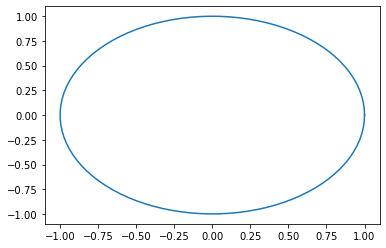

In [12]:
t = np.linspace(0, 2 * np.pi, 100)

plt.figure()
# поэлементно приминяем функции к сгенерированному массиву данных
plt.plot(np.cos(t), np.sin(t))
plt.show()

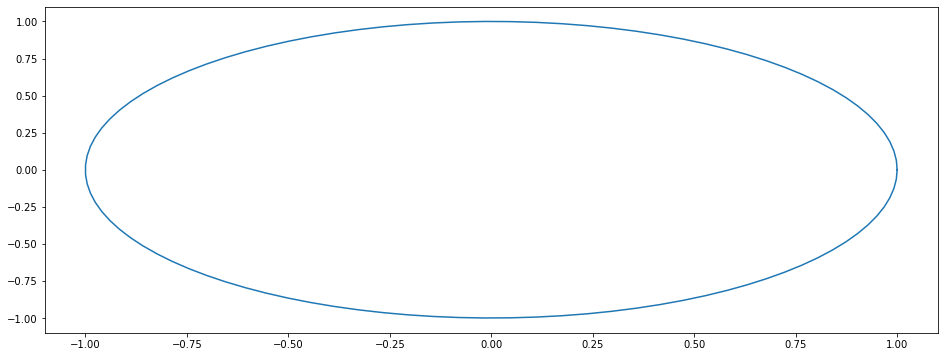

In [13]:
t = np.linspace(0, 2 * np.pi, 100)

plt.figure(figsize=(16, 6))
# поэлементно приминяем функции к сгенерированному массиву данных
plt.plot(np.cos(t), np.sin(t))
# plt.axes().set_aspect(1)
plt.show()

Чтобы окружности выглядели как окружности, а не как эллипсы, (а квадраты как квадраты, а не как прямоугольники), нужно установить aspect ratio, равный 1.

А вот одна из фигур Лиссажу.

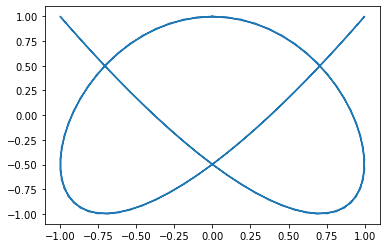

In [14]:
plt.figure()
plt.plot(np.sin(3 * t), np.cos(4 * t))
plt.show()

Для простой регулировки цветов и типов линий после пары $x$ и $y$ координат вставляется форматная строка. Первая буква определяет цвет (`'r'` - красный, `'b'` - синий и т.д.), дальше задаётся тип линии (`'-'` - сплошная, `'--'` - пунктирная, `'-.'` - штрих-пунктирная и т.д.).

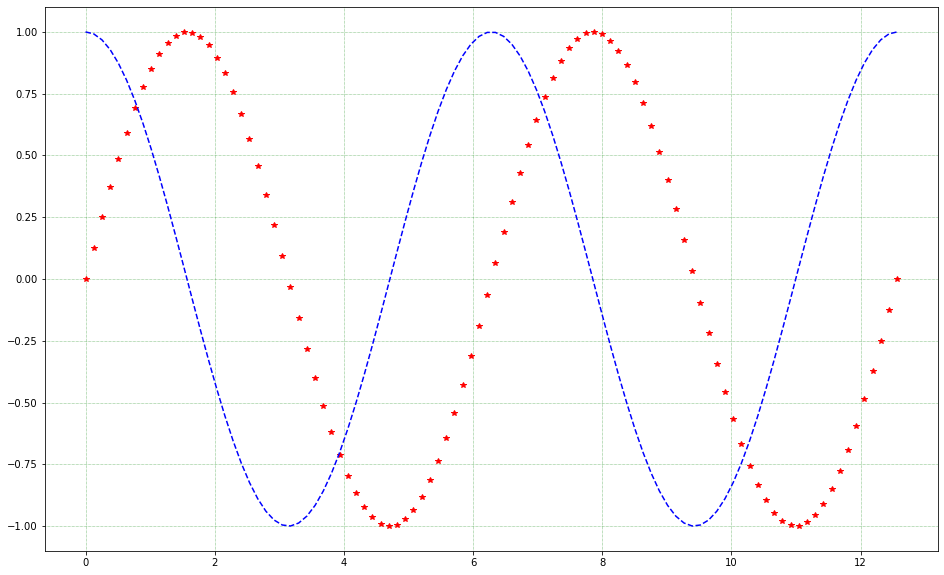

In [15]:
x = np.linspace(0, 4 * np.pi, 100)
plt.figure(figsize=(16, 10))
plt.grid(color="g", linestyle=":", linewidth=0.5)
plt.plot(x, np.sin(x), "r*")
plt.plot(x, np.cos(x), "b--")
plt.show()

In [ ]:
plt.plot?

Если в качестве "типа линии" указано `'o'`, то это означает рисовать точки кружочками и не соединять их линиями; аналогично, `'s'` означает квадратики. Конечно, такие графики имеют смысл только тогда, когда точек не очень много.

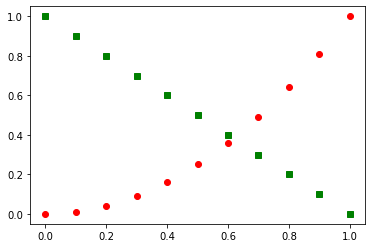

In [16]:
x = np.linspace(0, 1, 11)

plt.figure()
plt.plot(x, x ** 2, "ro")
plt.plot(x, 1 - x, "gs")
plt.show()

### Задача 1

Создайте функцию, которая принимает на вход набор значний и возвращает

*   $x^2$, если $x<0$
*   $-x^3$, если $ 0 =< x =< 2$
*   $x^3$, если $x > 2$

Постройте получившиеся значения на графике, по оси х - входной массив, по оси y - результат функции


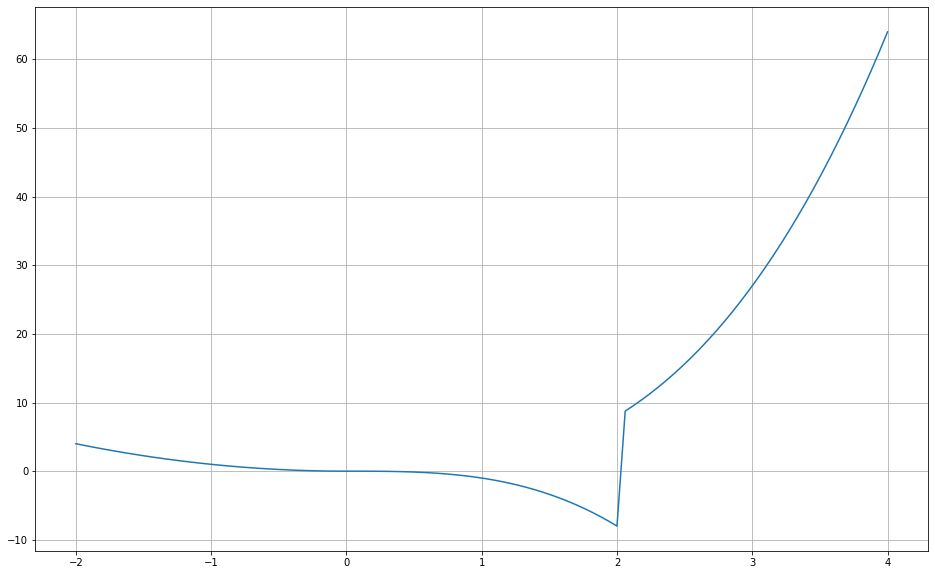

In [17]:
x = np.linspace(-2, 4, 100)


def func(x):
    answer = []
    for elem in x:
        if elem < 0:
            answer.append(elem ** 2)
        elif elem <= 2:
            answer.append(- elem ** 3)
        else:
            answer.append(elem ** 3)
    return answer

# отображение
plt.figure(figsize=(16, 10))
plt.plot(x, func(x))
plt.grid()

### Задача 2 (решена)

Отсортировать по убыванию возраста пассажиров титаника, отобразить на графике с подписью


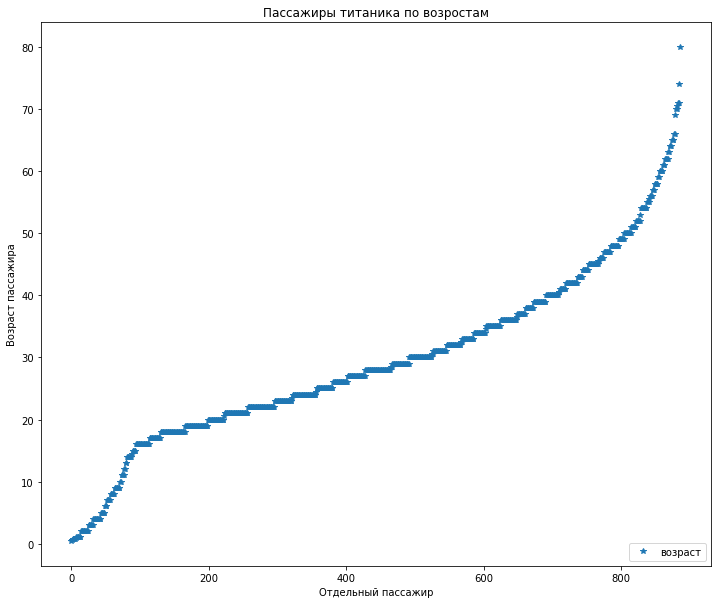

In [18]:
# импоритруем для загрузки данных
import pandas as pd


# загрузим набор данных пассажиров титаника
df = pd.read_csv("https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv")
# возьмем возраста пассажиров
age = df["Age"].tolist()

age.sort()
fig, ax = plt.subplots(figsize=(12, 10))
plt.plot(age, "*", label="возраст")
ax.set_title("Пассажиры титаника по возростам")
ax.set_xlabel("Отдельный пассажир")
ax.set_ylabel("Возраст пассажира")

# легенда графика
plt.legend(loc="lower right")

## Обзор возможностей

Библиотека не ограничивается созданием только одного типа графика (line plot). Давайте рассмотрим примеры других типов:

Диаграмма разброса (scatter plot)

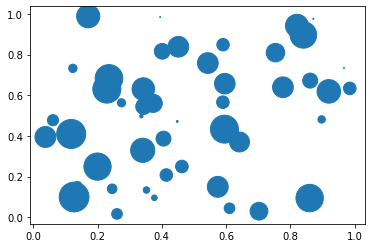

In [19]:
import matplotlib.pyplot as plt
import numpy as np


np.random.seed(123456)

# создадим 50 точек из равномерного распределния
N = 50
# координаты х, у
x = np.random.rand(N)
y = np.random.rand(N)
# и их радиус
area = (30 * np.random.rand(N)) ** 2  # 0 to 15 point radii
# отобразим
plt.scatter(x, y, s=area)
plt.show()

Столбчатые диаграммы (bar chart)

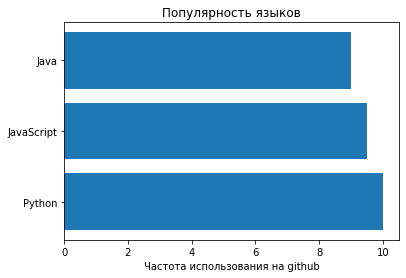

In [20]:
# задаем подписи отображаемых объектов
objects = ("Python", "JavaScript", "Java")
# задаем значения позиций подписей (по х)
y_pos = np.arange(len(objects))
# задаем значения (по y)
popularity = [10.0, 9.5, 9]
# создаем столбчатую диаграмму с вышеобозначенными значениями
plt.barh(y_pos, popularity)
# задаем подписи по оси х
plt.yticks(y_pos, objects)
# задаем название по y
plt.xlabel("Частота использования на github")
# задаем название всего графика
plt.title("Популярность языков")

plt.show()

Гистограммы (histogram)

In [21]:
# среднее распределения
mu = 42
# среднекадратичное отклонение
sigma = 3.14
# значения, сгенерированные из нормального распределения
# подробнее о нормальном распределении - https://ru.wikipedia.org/wiki/%D0%9D%D0%BE%D1%80%D0%BC%D0%B0%D0%BB%D1%8C%D0%BD%D0%BE%D0%B5_%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5
x = mu + sigma * np.random.randn(100000)
# отобразим несколько элементов
print(x)

[42.41725954 41.92561819 49.56796116 ... 38.61289757 46.48744982
 42.23108339]


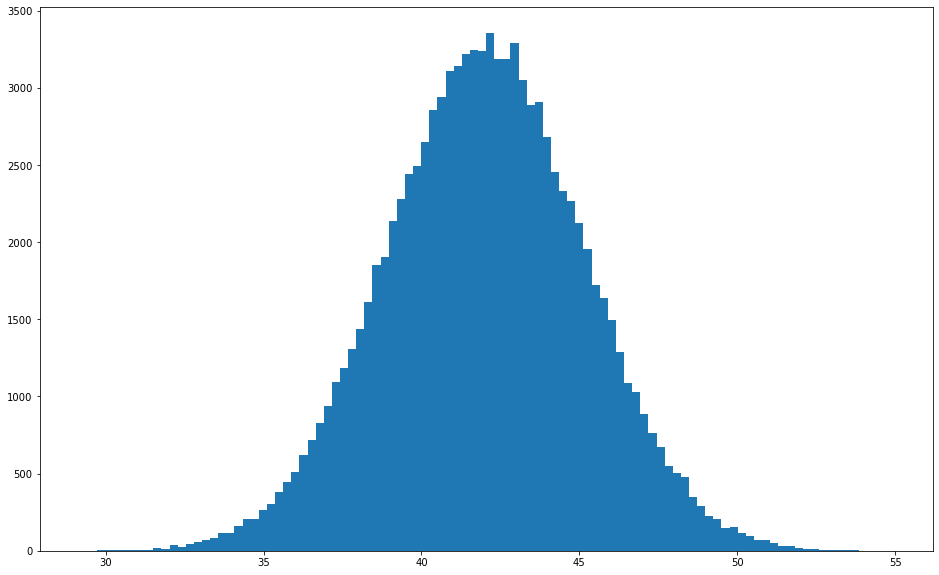

In [22]:
num_bins = 100
# Гистограмма переменной показывает распределение частоты этой переменной
# (высота столбца - сколько элеметов попало в диапазон этого столбца)
# В этом случае мы указали num_bins - количество столбцов заранее
plt.figure(figsize=(16, 10))
picture = plt.hist(x, num_bins)

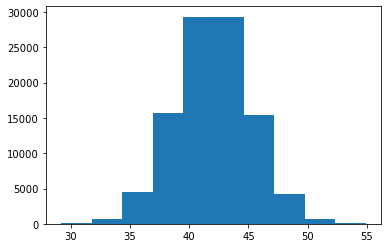

In [24]:
# а можем оставить это на усмотрение алгоритма
plt.hist(x);

Круговые диаграммы (pie chart)

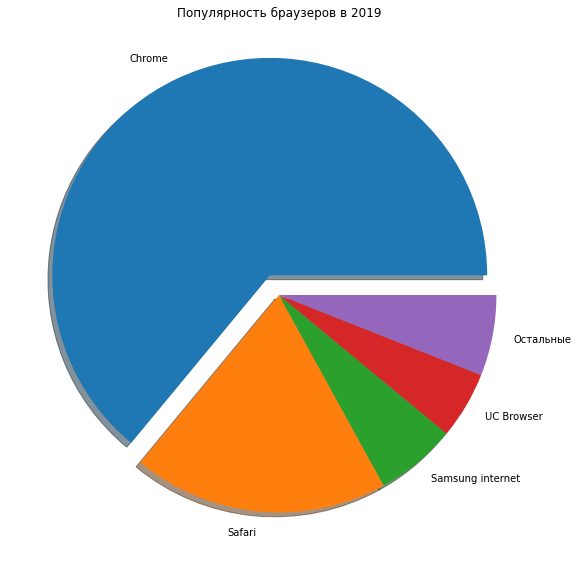

In [25]:
# определяем названия браузеров
labels = "Chrome", "Safari", "Samsung internet", "UC Browser", "Остальные"
# определяем значения для соответсвующих подписей
sizes = [64, 19, 6, 5, 6]
# определяем насколько мы ходим выделить каждый
explode = (0.1, 0, 0, 0, 0)
# создаем объект подграфика и ось с данными и подписями
fig1, ax1 = plt.subplots(figsize=(10, 10))
# функции имеют много различных настроек, к примеру тени
ax1.pie(sizes, explode=explode, labels=labels, shadow=True)
# задаем название всего графика
plt.title("Популярность браузеров в 2019")
# отображаем
plt.show()

### Задача 3

Построить гистограмму распределения по возрасту пассажиров, добавить подписи. Найти среднее и стандартное отклонение и медиану.

Подсказка:

Среднее и стандартное отклоенение - одни из основных статистик, которые находят при анализе данных. Грубо говоря стандартное отклонение показывает рассеянность значений случайной величины относительно её математического ожидания (среднее значение случайной величины).

$\mu$ = $\frac{\sum_i^n x_i}{n}$, где $x_i$ - элемент последовательности длинны $n$

$\sigma$ = $\sqrt{\frac{\sum_i^n (x_i - \mu)^2}{n}}$, где $x_i$ - элемент последовательности длинны $n$, а $\mu$ - среднее. (Из предположения, что данные являются генеральной совокупностью - совокупность всех объектов, относительно которых предполагается делать выводы при изучении конкретной задачи)

В случае, если данные выбраны из большого распредления (чаще всего на практике формула принимает вид:

$\sigma$ = $\sqrt{\frac{\sum_i^n (x_i - \mu)^2}{n-1}}$, где $x_i$ - элемент последовательности длинны $n$, а $\mu$ - среднее. Это стандартное отклонение на основании несмещённой оценки дисперсии.

Медиана ряда – это значение, которая делит его на две равные части (по количеству вариант).
Если число элементов нечетно, то медиана - среднее значение отортированного набора значений. Если нет, то среднее арифметическое двух цетнтральных.


In [26]:
# Воспользуемся старыми данными возраста пассажиров титаника
df = pd.read_csv("https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv")
# возьмем возраста пассажиров
age = df["Age"].tolist()

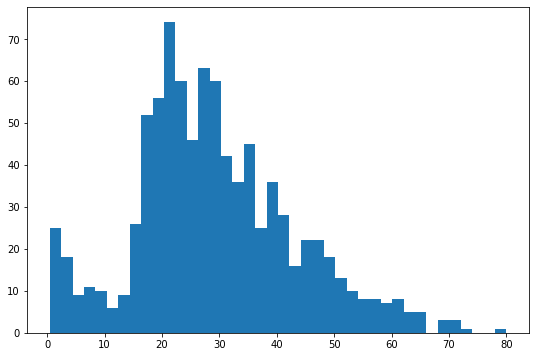

In [27]:
fix, ax = plt.subplots(figsize=(9, 6))

hist = plt.hist(age, 40)

## 2 Основные функции модуля matplotlib.pyplot

Далее мы перечислим самые часто используемые функции из модуля matplotlib.pyplot. Примеры будут минималистичны, все настройки будут по умолчанию.

### 2.1 Примитивы

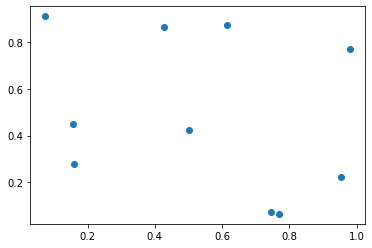

In [28]:
# Точки (aka scatter plot) 
plt.scatter(
    np.random.rand(10),  # абсциссы точек
    np.random.rand(10)  # ординаты точек
)
plt.show()

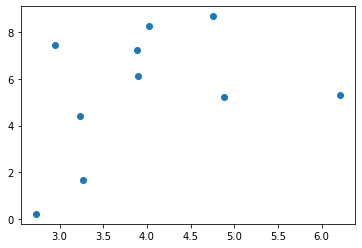

In [29]:
plt.scatter(
    np.random.rand(10) * 10,  # абсциссы точек
    np.random.rand(10) * 10  # ординаты точек
)
plt.show()

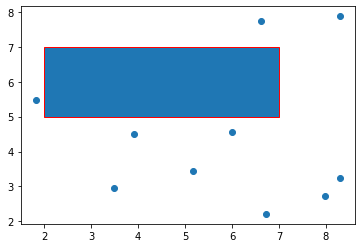

In [31]:
#Patches - https://matplotlib.org/3.1.1/api/patches_api.html

import matplotlib.patches as mpatches

figure, ax = plt.subplots(1)

rect = mpatches.Rectangle((2, 5), 5, 2, edgecolor='r', facecolor="b")

# print(dir(rect))

ax.scatter(
    np.random.rand(10) * 10,  # абсциссы точек
    np.random.rand(10) * 10  # ординаты точек
)

ax.add_patch(rect)

plt.show()

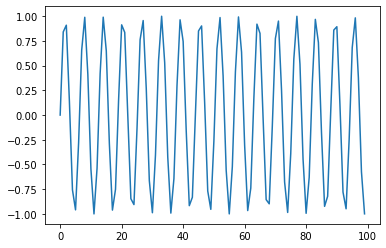

In [32]:
# Ломаная линия
plt.plot(
    np.arange(100),  # абсциссы точек
    np.sin(np.arange(100))  # ординаты точек
)
plt.show()

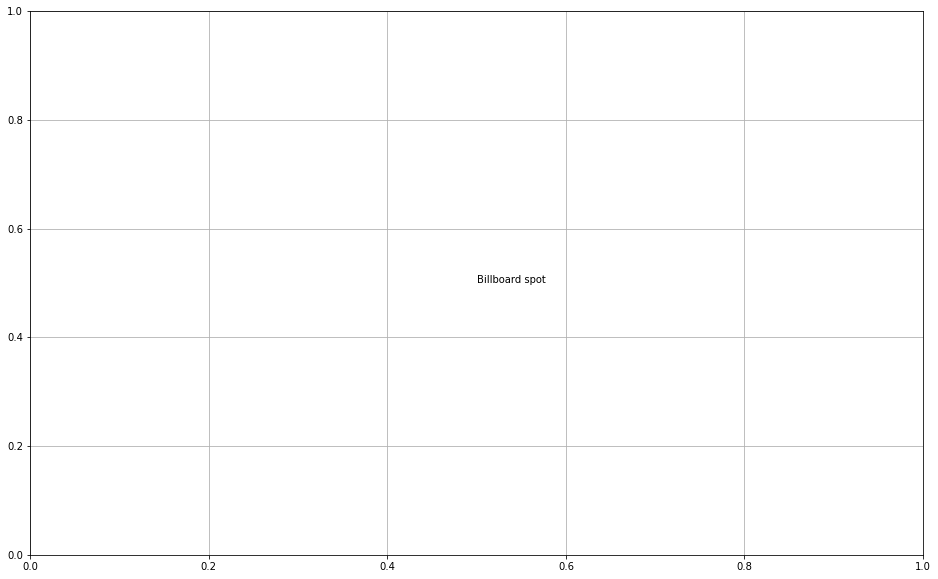

In [33]:
# Текст

plt.figure(figsize=(16, 10))
plt.text(
    0.5,  # Абсцисса начала текста в координатах графика
    0.5,  # Ордината начала текста в координатах графика
    'Billboard spot'  # собственно ваш текст
)

plt.grid()
plt.show()

Text(0.5, 0.5, 'Billboard spot')

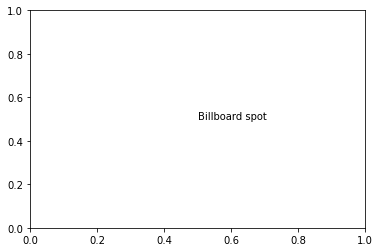

In [34]:
plt.text(0.5, 0.5, 'Billboard spot')

### 2.2. Диаграммы

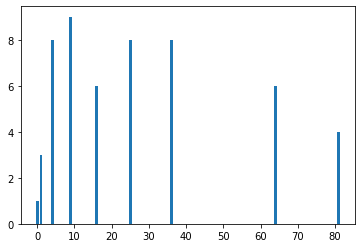

In [35]:
# Столбцовая диаграмма
plt.bar(
    np.arange(10) ** 2,  # Позиции столбцов
    np.random.randint(low=0, high=10, size=10)  # Высоты столбцов
)
# plt.text(50, 5, 'Billboard spot')
plt.show()

In [ ]:
# Гистограмма
array = np.random.randint(low=0, high=5, size=20)
plt.hist(array)
plt.show()

[ 1  2  3  4  5  6  7  8  9 10]


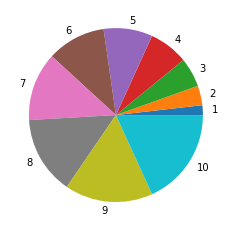

In [36]:
#  Круговая диаграмма
print(np.arange(1, 11))
plt.pie(
    np.arange(1, 11),
    labels=list(map(str, range(1,11)))
)
plt.show()

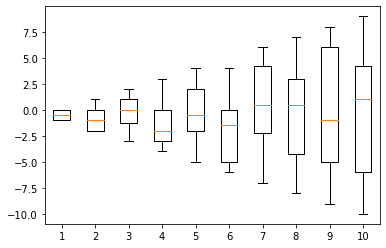

In [37]:
# Ящик с усами.
# Каждый ящик показывает диапазон от 25 до 75 квантили в значениях, а усы - максимум и минимум в значениях
plt.boxplot(
    [
        np.random.randint(low=-i, high=i, size=20) # Значения по которым строится ящик №i
        for i in range(1, 11)
    ]
)
plt.show()

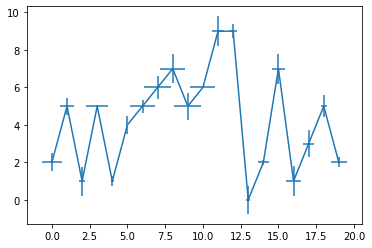

In [39]:
# Усы. В каждой точке графика откладываются ошибки измерений по абсциссе и ординате
plt.errorbar(
    np.arange(20),  # абсциссы точек 
    np.random.randint(low=0, high=10, size=20),  # ординаты точек  
    xerr=np.random.rand(20),  # ошибки расположения каждой точки по оси x
    yerr=np.random.rand(20)  # ошибки расположения каждой точки по оси y
)
plt.show()

### 2.3. Отображения

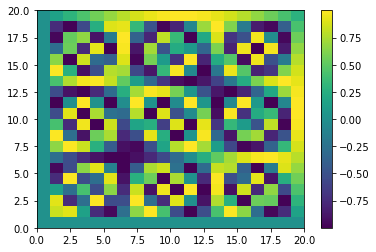

In [40]:
# Цветовое представление двумерного массива
# Построить цветовую карту
color_map = plt.pcolormesh(
    np.sin(np.outer(np.arange(20), np.arange(20)))  # двумерный массив значений
)
# Добавить к ней столбец с объяснением соответствия между цветом и величиной хранимой в массиве
plt.colorbar(color_map)
plt.show()
del color_map

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


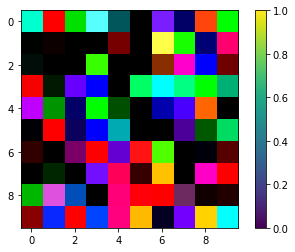

In [41]:
# Цветовое представление двумерного массива
# Построить цветовую карту
color_map = plt.imshow(
    np.random.normal(size=(10, 10, 3))  # рандомное RGB - изображение, цветовые каналы представлены числaми из [0,1]
)
# Добавить к ней столбец с объяснением соответствия между цветом и величиной хранимой в массиве
plt.colorbar(color_map)
plt.show()
del color_map

А в чём разница?

== https://stackoverflow.com/questions/21166679/when-to-use-imshow-over-pcolormesh

### 2.4. Контурные рисунки

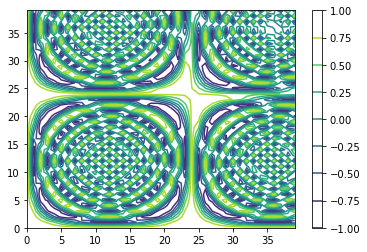

In [42]:
# Строим контурное изображение
contours = plt.contour(
    np.cos(  # Возьмем чтобы было весело
        np.outer(  # умножаем колонку на столбец чтобы получить матрицу
            np.linspace(start=0, stop=20, num=40),  # сгенерировать равномерную сетку из 40 точек на отрезке [0, 20]
            np.linspace(start=0, stop=20, num=40)
        )
    )
)
# Добавляем шкалу
plt.colorbar(contours)
plt.show()

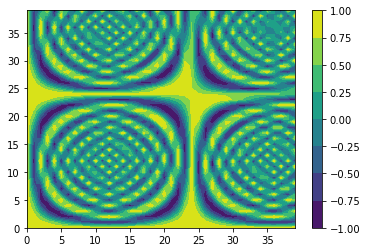

In [43]:
# Строим контурное изображение c заливкой
contours = plt.contourf(
    np.cos(
        np.outer(
            np.linspace(start=0, stop=20, num=40),
            np.linspace(start=0, stop=20, num=40)
        )
    )
)
# Добавляем шкалу
plt.colorbar(contours)
plt.show()
del contours

### 2.5. Заливка

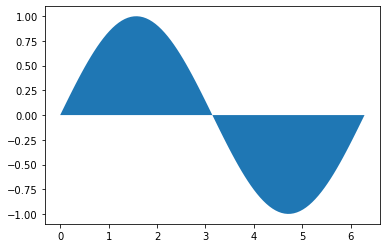

In [44]:
# Простейшая заливка - заливается область между графиком функции и осью абсцисс
plt.fill(
    np.linspace(start=0, stop=2*np.pi, num=100),  # абсциссы точек
    np.sin(np.linspace(start=0, stop=2*np.pi, num=100))  # ординаты точек
)
plt.show()

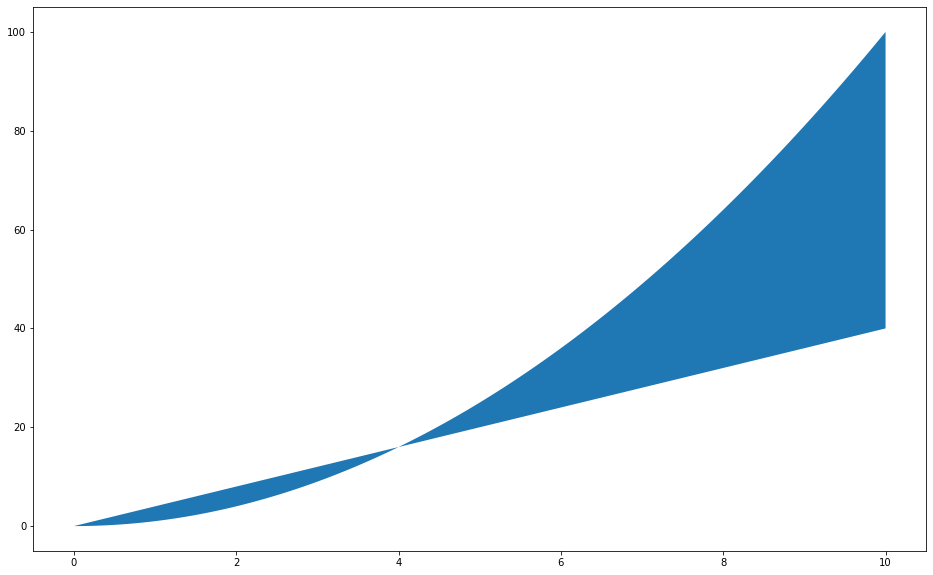

In [45]:
# Заливка между двумя графиками функций
plt.figure(figsize=(16, 10))

plt.fill_between(
    np.linspace(0, 10, 1000),  # абсциссы точек
    np.linspace(0, 10, 1000) ** 2,  # ординаты первой кривой 
    np.linspace(0, 10, 1000) * 4  # ординаты второй кривой
)
plt.show()

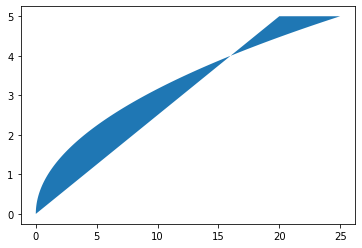

In [46]:
# Заливка между двумя графиками функций
plt.fill_betweenx(
    np.linspace(0, 5, 100),  # ОРДИНАТЫ точек
    np.linspace(0, 5, 100) ** 2,  # АБСЦИССЫ первой кривой 
    np.linspace(0, 5, 100) * 4  # АБСЦИССЫ второй кривой
)
plt.show()

### 2.5 Векторные диаграммы

In [47]:
n_points = 1000
x = np.linspace(-2 * np.pi, 2 * np.pi, n_points)
y = np.linspace(-2 * np.pi, 2 * np.pi, n_points)

In [48]:
type(np.meshgrid(np.sin(x), np.cos(y)))

list

In [49]:
np.meshgrid(np.sin(x), np.cos(y))[0]

array([[ 2.44929360e-16,  1.25786178e-02,  2.51552454e-02, ...,
        -2.51552454e-02, -1.25786178e-02, -2.44929360e-16],
       [ 2.44929360e-16,  1.25786178e-02,  2.51552454e-02, ...,
        -2.51552454e-02, -1.25786178e-02, -2.44929360e-16],
       [ 2.44929360e-16,  1.25786178e-02,  2.51552454e-02, ...,
        -2.51552454e-02, -1.25786178e-02, -2.44929360e-16],
       ...,
       [ 2.44929360e-16,  1.25786178e-02,  2.51552454e-02, ...,
        -2.51552454e-02, -1.25786178e-02, -2.44929360e-16],
       [ 2.44929360e-16,  1.25786178e-02,  2.51552454e-02, ...,
        -2.51552454e-02, -1.25786178e-02, -2.44929360e-16],
       [ 2.44929360e-16,  1.25786178e-02,  2.51552454e-02, ...,
        -2.51552454e-02, -1.25786178e-02, -2.44929360e-16]])

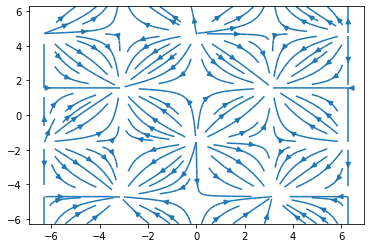

In [50]:
# Векторный поток
# Готовим координатную сетку
n_points = 1000
x = np.linspace(-2*np.pi, 2*np.pi, n_points)
y = np.linspace(-2*np.pi, 2*np.pi, n_points)
# Координаты векторов в координатной сетке
vx, vy = np.meshgrid(np.sin(x), np.cos(y))
plt.streamplot(x, y, vx, vy)
plt.show()
del n_points, x, y, vx, vy

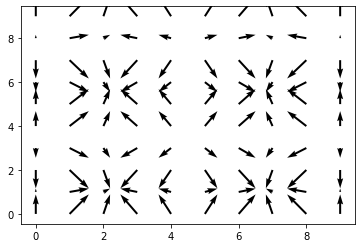

In [51]:
# Векторное поле
# Готовим координатную сетку
n_points = 10
# plt.figure(figsize=(10, 6))
x = np.linspace(-2*np.pi, 2*np.pi, n_points)
y = np.linspace(-2*np.pi, 2*np.pi, n_points)
# Координаты векторов в координатной сетке
vx, vy = np.meshgrid(np.sin(x), np.cos(y))
plt.quiver(vx, vy)
plt.show()
del n_points, x, y, vx, vy

Ну что же, это было краткое введение. Его достаточно для рисования большинства графиков, но это конечно же не все, что может matplotlib. Так что советую продолжить чтение.

## 3 Сложные примеры

#### 3.1. Работа с текстом

Разберем пример показывающий какие элементы рисунка могут быть на области рисования и какие у них могут быть настройки. Мы нарисуем рисунок на котором будет
 - одна область рисования
 - заголовок рисунка
 - заголовок графика
 - график функции $\cos(x^2)$
 - аннотация
 - текст в рамке
 - подписи к осям X и Y
 - легенда
 - координатная сетка
 
Все именованные параметры функций являются опциональными. Поудаляйте их чтобы увидеть как по умолчанию отображаются эти элементы.

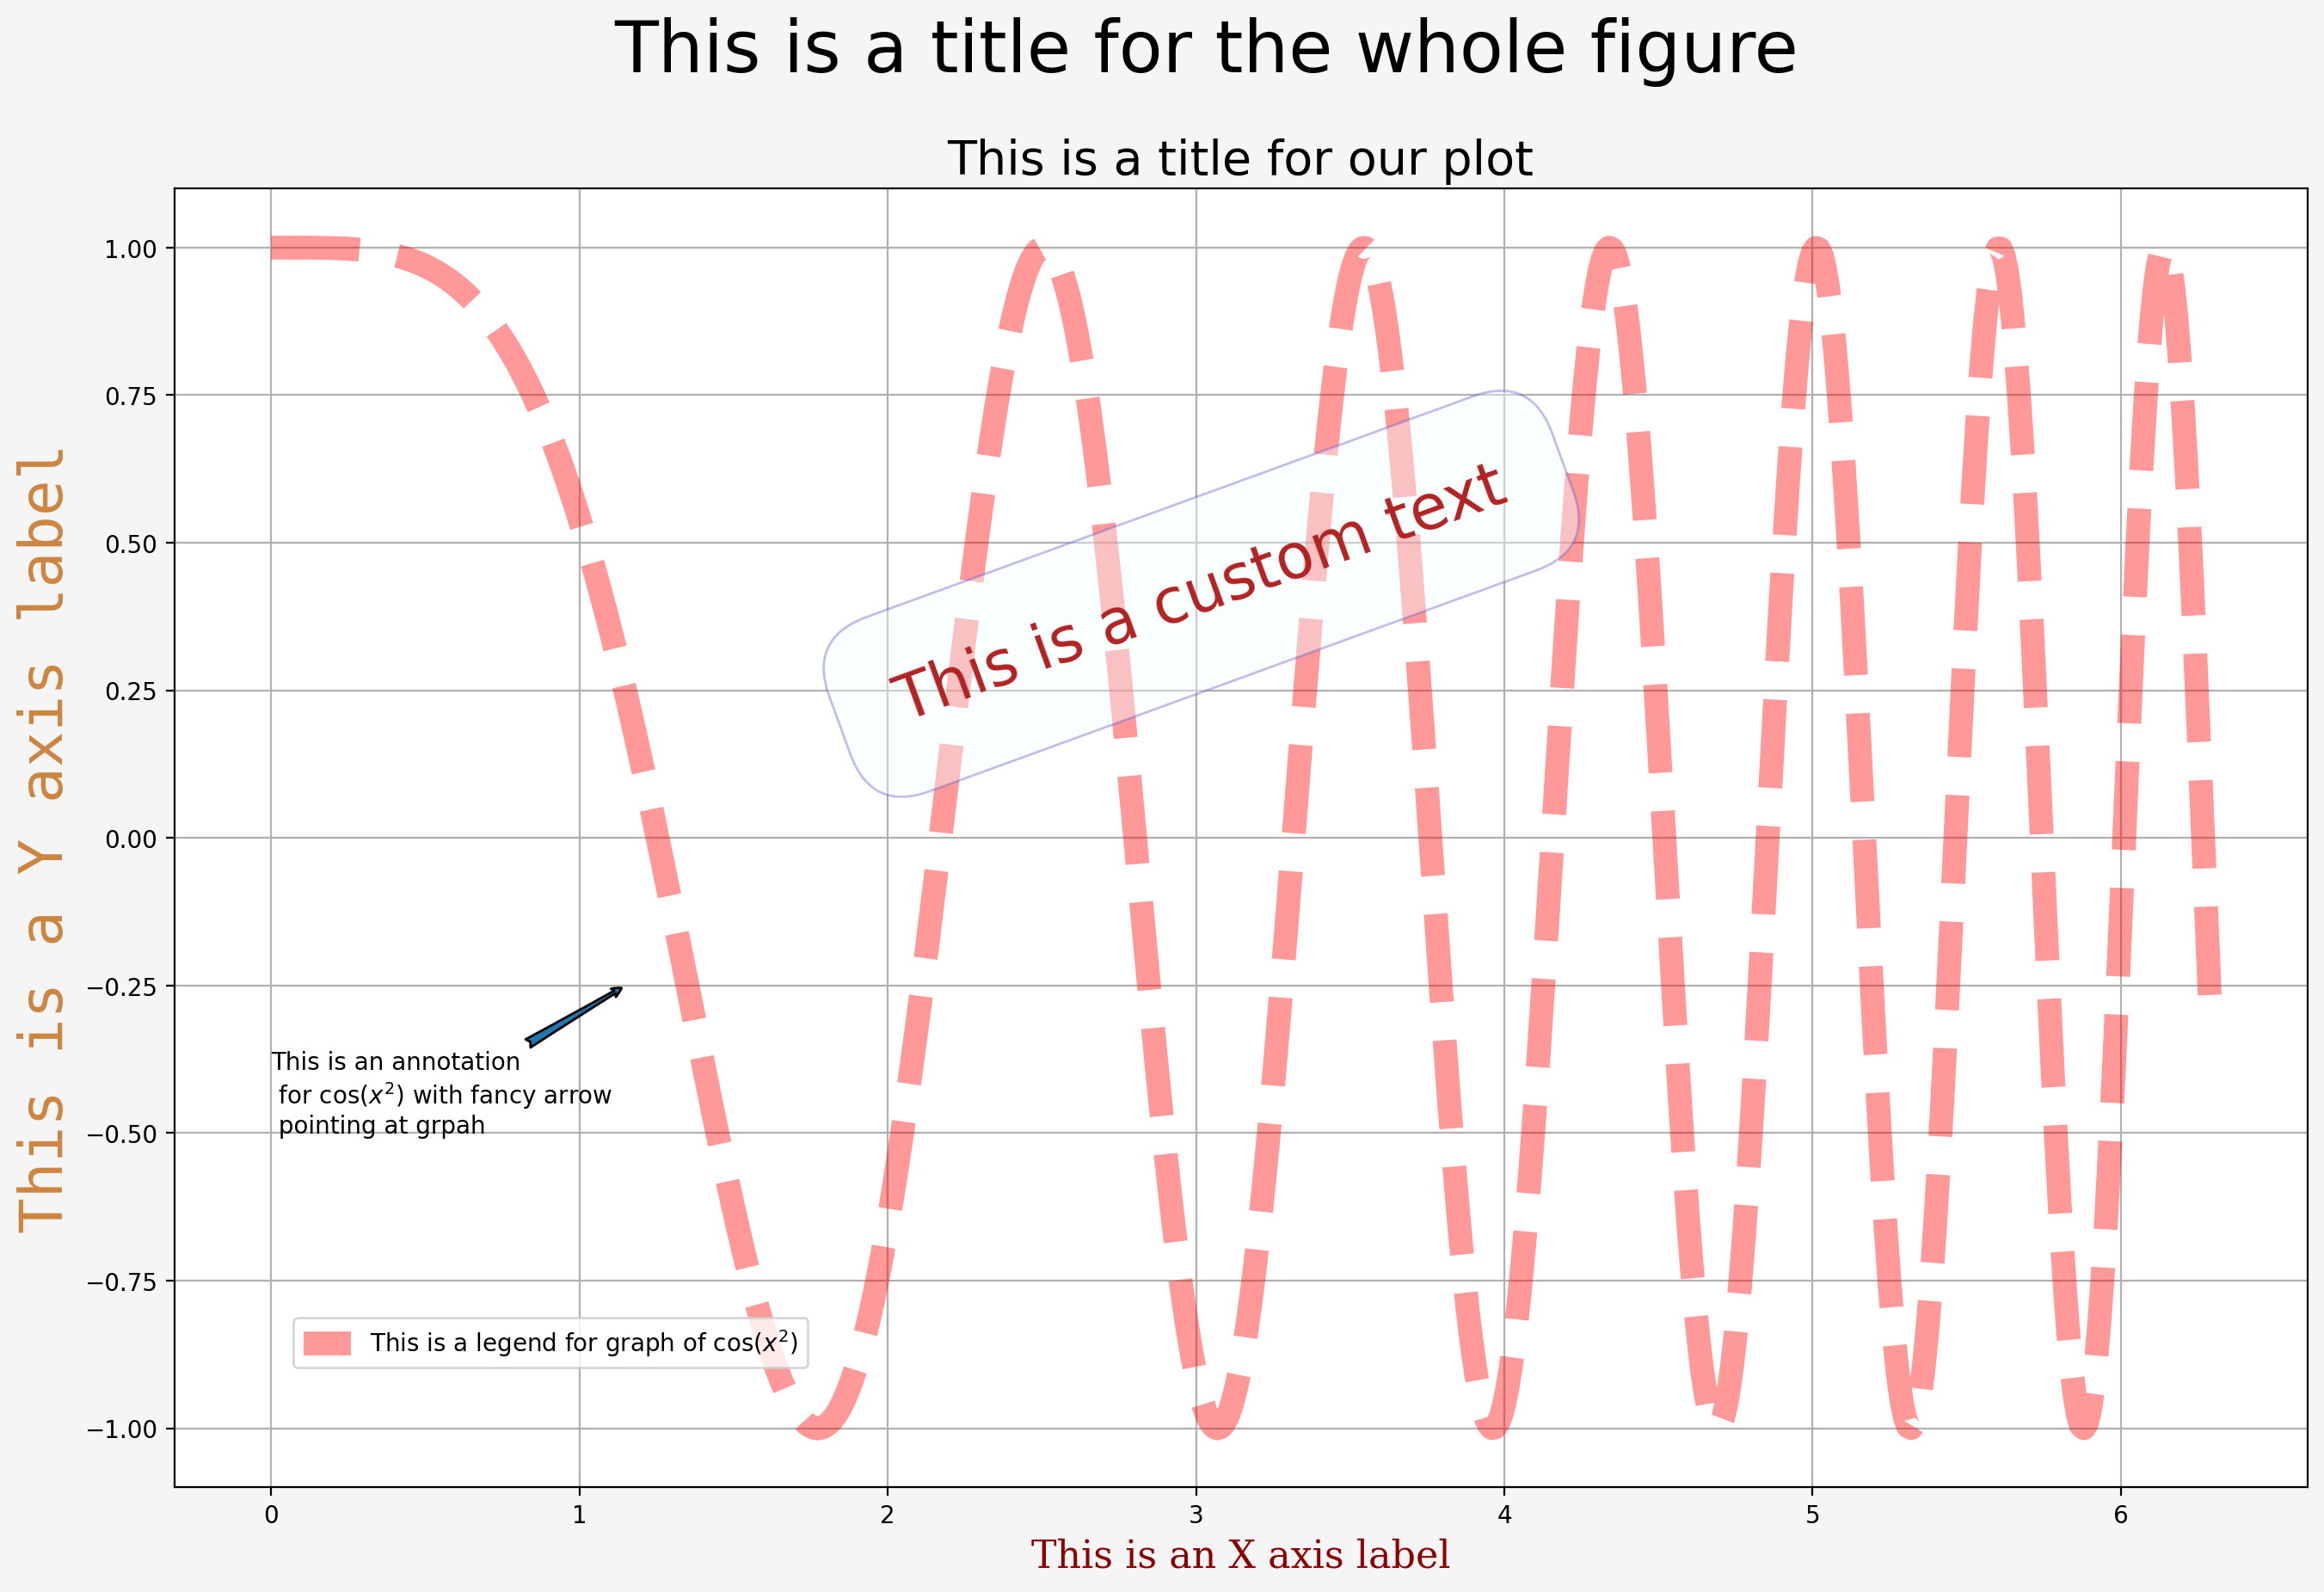

In [52]:
#  Генерируем данные
step = 0.01
# создать массив чисел от 0 до 2pi с шагом 0.01
x = np.arange(0.0, 2*np.pi + step, step)
#  посчитать cos(x^2) от полученной сетки x'ов
y = np.cos(x * x)

# Создать рисунок 
fig = plt.figure(
    figsize=(16, 10),  # размером 16 на 10 дюймов
    facecolor='whitesmoke',  # c подложкой цвета белый дым
    dpi=200  # разрешением 200 точек
)

# Добавить заголовок рисунка с 30-м шрифтом
plt.suptitle('This is a title for the whole figure', fontsize=30)

# Добавить заголовок графика
plt.title('This is a title for our plot', fontsize=20)

# Нарисовать cos(x^2)
plt.plot(
    x, y,
    color='red',  # Цвет пурпурный
    linestyle='--',  # Стиль - пунктирная линия
    alpha=0.4,  # Непрозрачность
    linewidth=10,  # Толщина
    label='This is a legend for graph of $\cos(x^2)$'  # Подпись в легенде. Можно использовать TeX!
)

# Добавим аннотацию
plt.annotate(
    'This is an annotation\n for $\cos(x^2)$ with fancy arrow\n pointing at grpah',
    xy=(1.15, -0.25),  #  точка куда будет указывать стрелка
    arrowprops=dict(arrowstyle='fancy'),
    xytext=(0, -0.5)  # расположение аннотации
)

# Поставить легенду
plt.legend(
    loc='lower left',  # Снизу слева
    borderaxespad=5  # С отступом 5 от осей
)

# Добавить подписи к осям X и Y
plt.xlabel(
    'This is an X axis label',  # Текст
    fontdict=dict(family='serif', 
                  color='darkred', 
                  weight='normal', 
                  size=16)  # Настройки шрифта
)
plt.ylabel(
    'This is a Y axis label',
    fontdict=dict(family='monospace', 
                  color='peru', 
                  weight='light', 
                  size=25)
)

# Добавить текст
plt.text(
    2.0, 0.2,  # Позиция начала текста
    'This is a custom text',  # Собственно сам текст
    fontsize=26,  # Размер шрифта
    color='firebrick',  # Цвет букв
    rotation=20,
    bbox=dict(  # Параметры рамки ограничивающей текст
        alpha=0.4, # Прозрачность фона рамки
        edgecolor='slateblue',  # цвет рамки
        facecolor='azure',  # цвет подложки
        pad=1., # отступ рамки от текст
        boxstyle='round'  # форма рамки
    )
)

# Добавить координатную сетку
# Получающиеся вертикальные линии это Xticks, а горизонтальные Yticks
plt.grid()

plt.show()
del step, x, y, fig

#### 3.2. Полярные координаты

Область рисования может быть непрямоугольной, напрмер если вы используете полярные координаты. В этом случае вам придется самостоятельно создать область рисования. Мы создадим ее методом add_axes указав размеры прямоугольника в котором будет находится область рисования. Тут стоит сказать, что на рисунке действуют относительные координаты, в диапазоне от 0 до 1. В этом примере мы будем использовать более объектно ориентированный подход и будем вызывать методы объектов, а не функции модуля plt. Использовать функции модуля plt считается плохим тоном так как вы постоянно оперируете глобальным состоянием к которому еще и не имеете доступа.

In [ ]:
len(np.arange(0.0, 2 * np.pi + .01, .01))

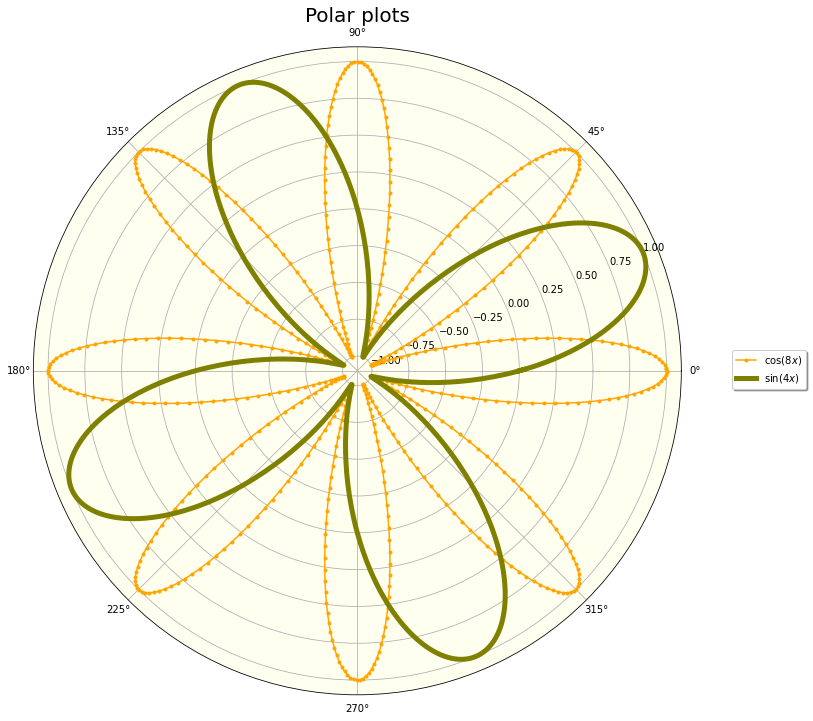

In [53]:
# Готовим данные
step = 0.01
phi = np.arange(0.0, 2*np.pi + step, step)
rho1 = np.cos(8 * phi)
rho2 = np.sin(4 * phi)

fig = plt.figure(figsize=(16, 9))
# Создать область рисования для полярных координат с подложкой цвета слоновой кости :)
# Левый нижний угол будет в точке (0,0)
# Ширина и высота соответственно 1 и 1 (то есть на весь рисунок)
ax = fig.add_axes([0,0,1,1], polar=True, facecolor='ivory')

ax.set_title('Polar plots', fontsize=20)

ax.plot(
    phi, rho1,
    color='orange', 
    marker='o',  # Добавить круглые метки в тех точках по которым строилась линия
    markersize=3,  #  Размер меток
    label='$\cos(8x)$'
)

ax.plot(
    phi, rho2,
    linewidth=5,
    color='olive',
    label='$\sin(4x)$'
)

# Раз мы указали label, то надо сделать легенду
ax.legend(
    bbox_to_anchor=(1.2, 0.54),  # кастомное положение легенды
    fancybox=True,
    shadow=True
)

ax.grid(True)

plt.show()
del step, phi, rho1, rho2, fig, ax

#### 3.3. Разные типы графиков на одном рисунке

Мы нарисуем 
 - набор случайных измерений функци $cos(x)$ к которому добавив белый шум с нулевым средним и дисперсией 0.25
 - собственно график cos(x)
 - и область в которой лежат изменения отстоящие не более чем на 1 сигму

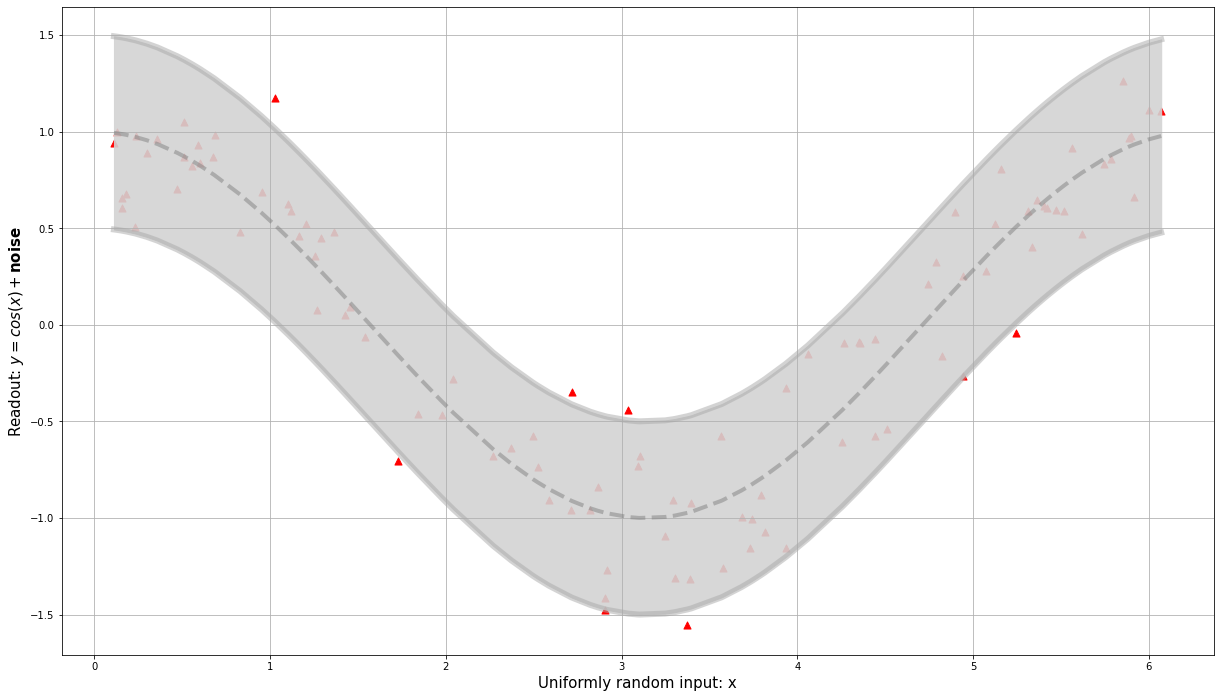

In [54]:
# Готовим данные
scale = 0.5
n_points = 100
x = 2 * np.pi * np.sort(np.random.rand(100))
y = np.cos(x)
y_noise = y + np.random.normal(scale=0.25, size=n_points)

# Готовим рисунок
fig = plt.figure(figsize=(16, 9))
# Готовим область рисования.
ax = fig.add_axes([0, 0, 1, 1])  

# Собственно scatter plot
ax.scatter(
    x, y_noise,
    marker='^',  # Отмечаем точки треугольниками
    s=50,  # Размера 50
    color='red'  #  Красного цвета
)

# График самой функции cos(x)
ax.plot(
    x, y,
    color='grey',
    linestyle='--',
    alpha=0.5,
    linewidth=4
)

# Графики отклоненний на 1 сигму
for shift in (scale, -scale):
    ax.plot(
        x, y + shift,
        alpha=0.5,
        color='darkgrey',
        linewidth=6
    )

# Сделаем заливку всего что находится между отклонениями
ax.fill_between(
    x, y - scale, y + scale,
    alpha=0.9,
    color='lightgrey',
)

# Подпишем оси
ax.set_xlabel('Uniformly random input: x', fontsize=15)
ax.set_ylabel('Readout: $y=cos(x)+\mathbf{noise}$', fontsize=15)
    
ax.grid(True)

plt.show()
del scale, n_points, x, y, y_noise, fig, ax

Как вы видели по последним примерам большая часть рисования происходит через работу с областью рисования (Axes). Этот объект-контейнер содержит в себе другие контейнеры и объекты-примитивы. Видно, что существует множество методов для создания и изменения свойств элементов рисунков и графических примитивов. Всё, что можно сделать через pyplot, можно сделать работая непосредственно с axes-экземплярами. Получаются такие соответствия:

Метод объекта Axes -> Краткое описание -> объект типа Artist создаваемый методом -> Контейнер в котором будет храниться Artist

    ax.annotate -> текстовая подпись -> Annotate -> ax.texts

    ax.text -> текст -> Text -> ax.texts

    ax.bar -> столбчатая диаграмма -> Rectangle -> ax.patches

    ax.errorbar -> график погрешностей -> Line2D и Rectangle -> ax.lines и ax.patches

    ax.fill -> заливка области -> Polygon -> ax.patches

    ax.hist -> гистограмма -> Rectangle -> ax.patches

    ax.imshow -> изображение -> AxesImage -> ax.images

    ax.legend -> легенда -> Legend -> ax.legends

    ax.plot -> XY график -> Line2D -> ax.lines

    ax.scatter -> точечная диаграмма -> PolygonCollection -> ax.collections


#### 3.4. Несколько областей рисования

Зачастую необходимо расположить несколько областей на одном графике. Для этого надо создать несколько областей рисования и работать с каждой в отдельности. В следующем примере мы нарисуем график функции $x^2(2+\sin(1/x))$ и добавим еще одну область рисования для самой интересной части графика

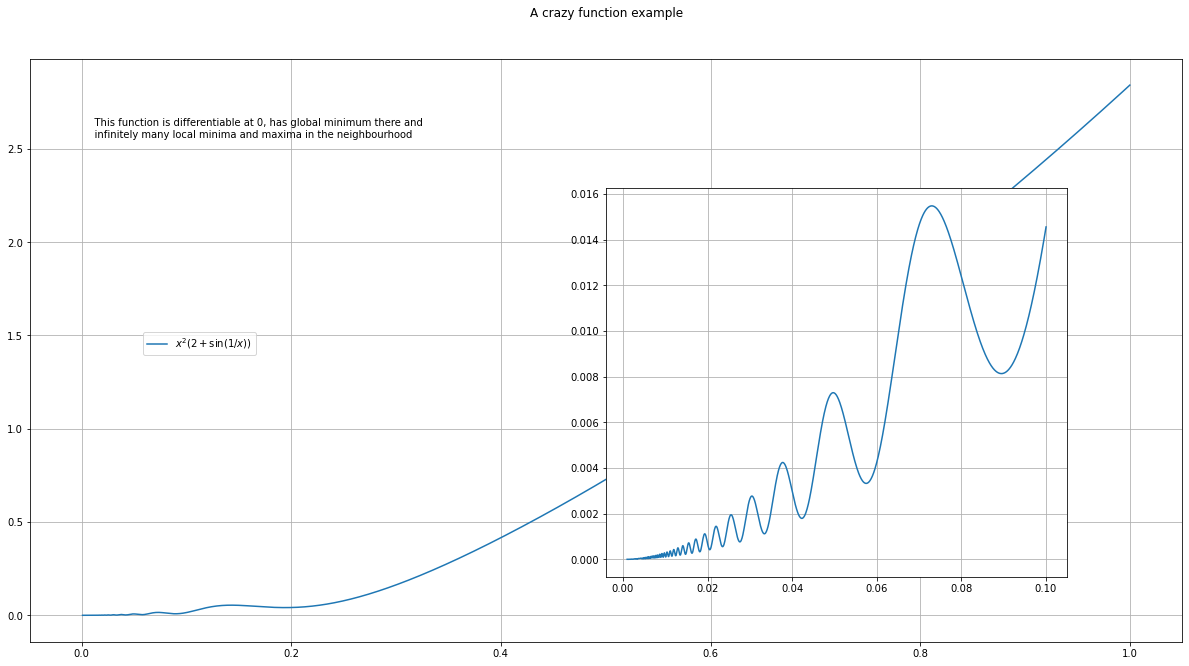

In [57]:
def crazy_func(x):
    return x * x * (2 + np.sin(1 / x))

fig = plt.figure(figsize=(16, 9))

fig.suptitle('A crazy function example')

# Нарисуем основной график
big_ax = fig.add_axes([0, 0, 1, 0.9])
big_ax.plot(
    np.linspace(0.001, 1, 1000),
    np.apply_along_axis(crazy_func, 0, np.linspace(0.001, 1, 1000)),
    label='$x^2(2+\sin(1/x))$'
)

big_ax.text(
    0, 2.5,
    '''
    This function is differentiable at 0, has global minimum there and 
    infinitely many local minima and maxima in the neighbourhood
    '''
)

big_ax.legend(bbox_to_anchor=(0.2, 0.54))
big_ax.grid(True)

# Нарисуем вспомогательный график
small_ax = fig.add_axes([0.5, 0.1, 0.4, 0.6])
small_ax.plot(
    np.linspace(0.001, 0.1, 1000),
    np.apply_along_axis(crazy_func, 0, np.linspace(0.001, 0.1, 1000))
)
small_ax.grid(True)


plt.show()
del crazy_func, fig, big_ax, small_ax

#### 3.5. Мультиокна

В предыдущем примере мы создали две области рисования, но их расположение пришлось задавать явно с помощью координат. В большинстве случаев такой точный уровень настройки не нужен. Для этого в matplotlib существуют мультиокна. Во многом они похожи на области рисования. Создавать их можно из объекта Figure с помощью метода add_subplots. 

При использовании метода add_subplots рисунок разбивается как таблица на некоторое число строк и столбцов. Возникающие ячейки нигде не рисуются - это удобная абстракция. Далее можно выбрать одну из этих ячеек, и рисовать в ней. Чтобы сделать это надо в функцию subplots передать три числа или трехзначное число. Первая цифра указывает количество строк, вторая - столбцов, третья - порядковый номер ячейки в которой вы хотите рисовать (нумерация начинается с 1 идет слева направо и сверху вниз). Например, вызов fig.add_subplots(3, 3, 7) разобъет рисунок на 9 равных частей и вернет вам ячейку из нижнего левого угла. 

Преимущество подхода в том, что вы получаете области рисования одинакового размера не задумываясь о том какие должны быть у них координаты.

[Фигуры Лиссажу](https://ru.wikipedia.org/wiki/%D0%A4%D0%B8%D0%B3%D1%83%D1%80%D1%8B_%D0%9B%D0%B8%D1%81%D1%81%D0%B0%D0%B6%D1%83)

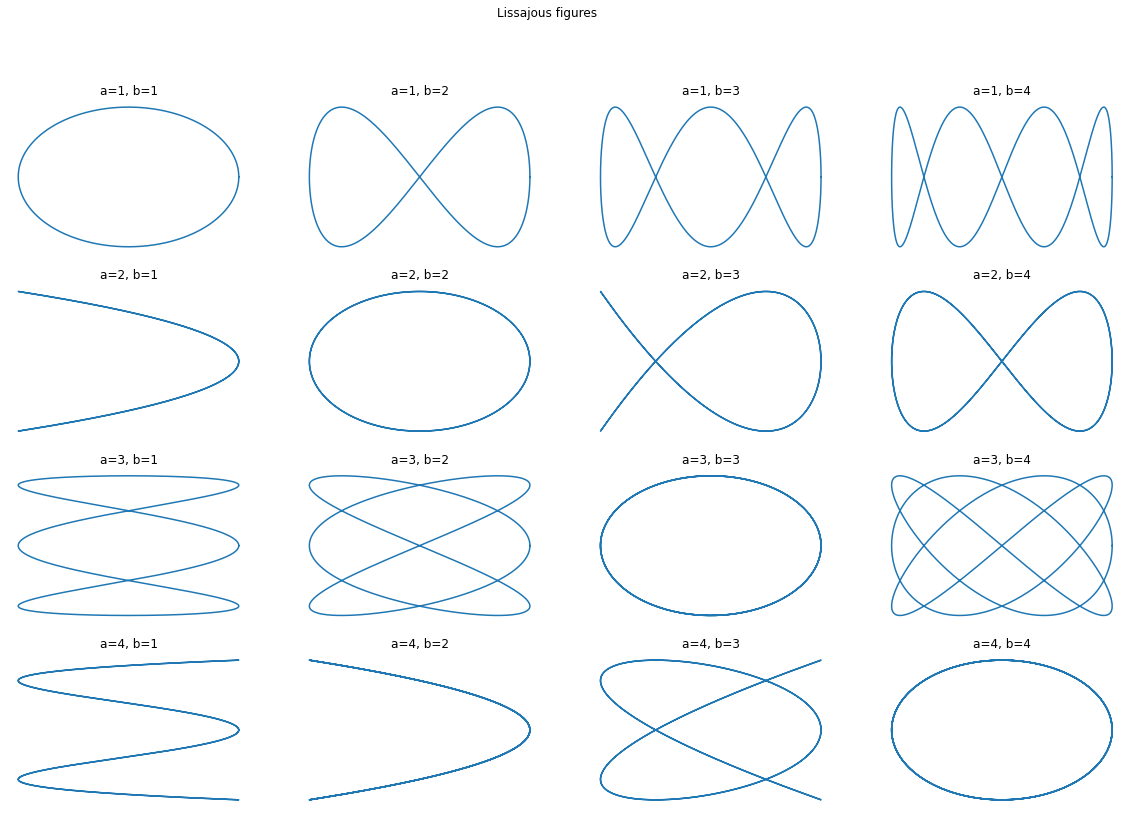

In [59]:
# Готовим данные
t = np.linspace(0, 2*np.pi, 1000)

# Здесь все как обычно
fig = plt.figure(figsize=(20, 13))
fig.suptitle('Lissajous figures')

nrows = 4
ncols = 4

for a in range(1, nrows + 1):
    for b in range(1, ncols + 1):
        # Выбираем ячейку
        ax = fig.add_subplot(nrows, ncols, (a - 1) * ncols + b)
        # Рисуем кривую Лиссажу
        ax.plot(
            np.cos(a*t),
            np.sin(b*t),
        )
        # Обираем оси координат (они только засоряют рисунок)
        ax.set_axis_off()
        # Делаем подписи
        ax.set_title(f'a={a}, b={b}')

plt.show()

#### А теперь, как это удобно делать:

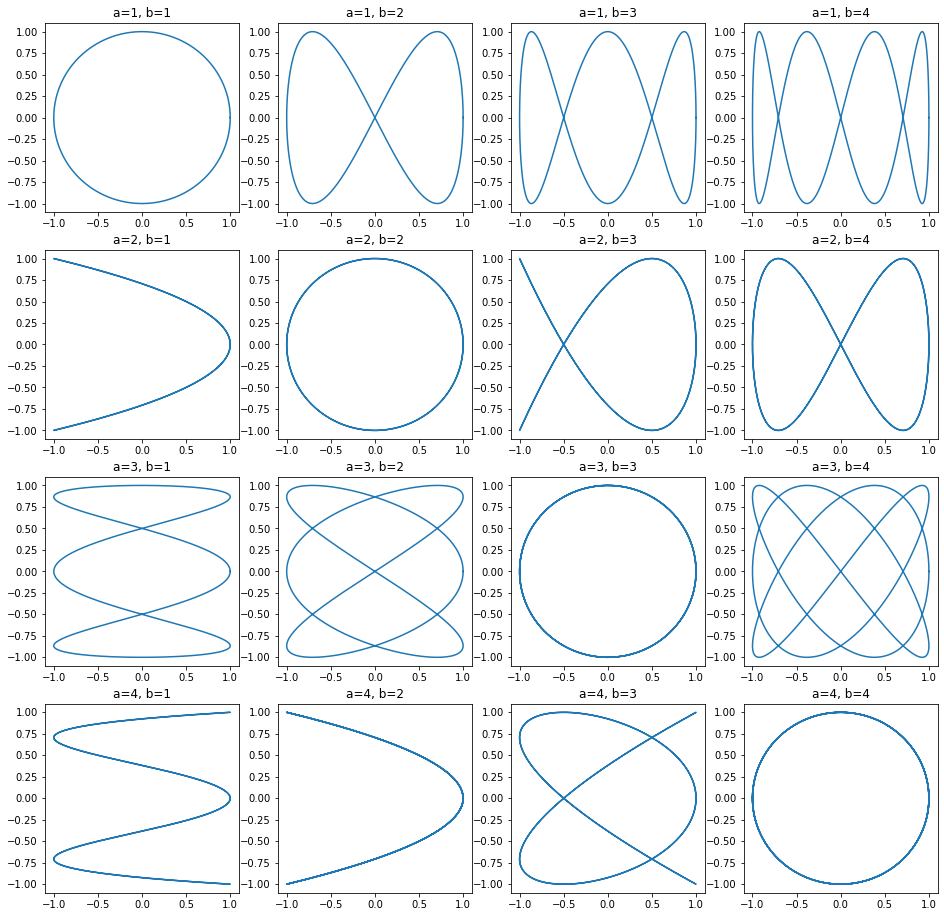

In [60]:
t = np.linspace(0, 2*np.pi, 1000)

figure, axes = plt.subplots(4, 4, figsize=(16, 16))

nrows = 4
ncols = 4

for a in range(nrows):
    for b in range(ncols):
        # Выбираем ячейку
        ax = axes[a][b]
        # Рисуем кривую Лиссажу
        ax.plot(
            np.cos((a+1)*t),
            np.sin((b+1)*t),
        )
        # Обираем оси координат (они только засоряют рисунок)
        # ax.set_axis_off()
        # Делаем подписи
        ax.set_title(f'a={a + 1}, b={b + 1}')

plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
x = np.arange(1e8)
y = 2 * x

In [ ]:
plt.figure(figsize=(16, 10))
plt.plot(x, y)

Иногда хочется собрать несколько графиков на одном рисунке, но их размеры должны отличаться. Для этого надо использовать объект GridSpec. 

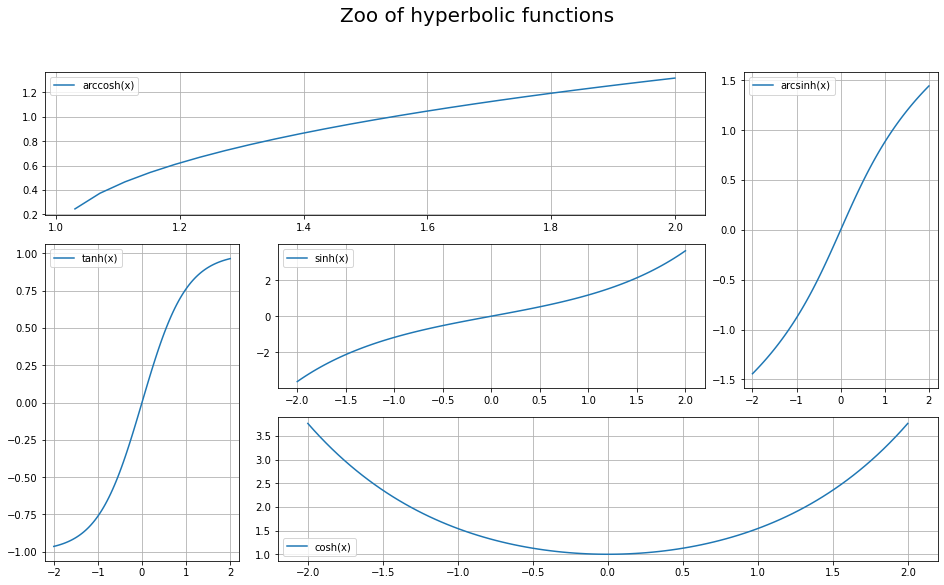

In [61]:
from matplotlib import gridspec  # GridSpec определен там

# Создаем картинку
fig = plt.figure(figsize=(16, 9))
fig.suptitle('Zoo of hyperbolic functions', fontsize=20)

# Создаем "спеку"
spec = gridspec.GridSpec(nrows=3, ncols=4)
# В метод add_suplot можно передать slicing от спеки. 
# Тем самым создастся область рисования занимающая ячейки соответствующие slicing'у 
fig.add_subplot(spec[0, :3])  # Добавить область рисования занимающую первые три ячейки первой строки
fig.add_subplot(spec[:2, 3])
fig.add_subplot(spec[2, 1:])
fig.add_subplot(spec[1:, 0])
fig.add_subplot(spec[1, 1:3])

trig_funcs = [np.sinh, np.tanh, np.cosh, np.arcsinh, np.arccosh]
points = np.linspace(-2, 2, 100)

for ax, func in zip(fig.axes, trig_funcs[::-1]):
    ax.plot(
        points,
        func(points),
        label='{}(x)'.format(func.__name__)
    )
    # Выбрать самое "хорошее" расположение для легенды
    ax.legend(loc='best')
    ax.grid(True)

plt.show()
del fig, spec, ax, func

#### 3.6. Координатные оси

В matplotlib оси координат являются элементом рисунка, а точнее контейнером типа Artist. Примеры - оси $x$, $y$ в декартовой системе координат, оси $\rho$, $\phi$ в полярной системе координат. Каждая ось содержит три группы графических примитивов: деления осей (ticks), подписи делений (tick lables), подписи осей (axis labels).

Деления на оси бывают главные и вспомогательные. Чтобы получить к ним доступ надо в методе get_ticks в аргумент which передавать 'major' или 'minor'. По умолчанию отображаются только major деления.

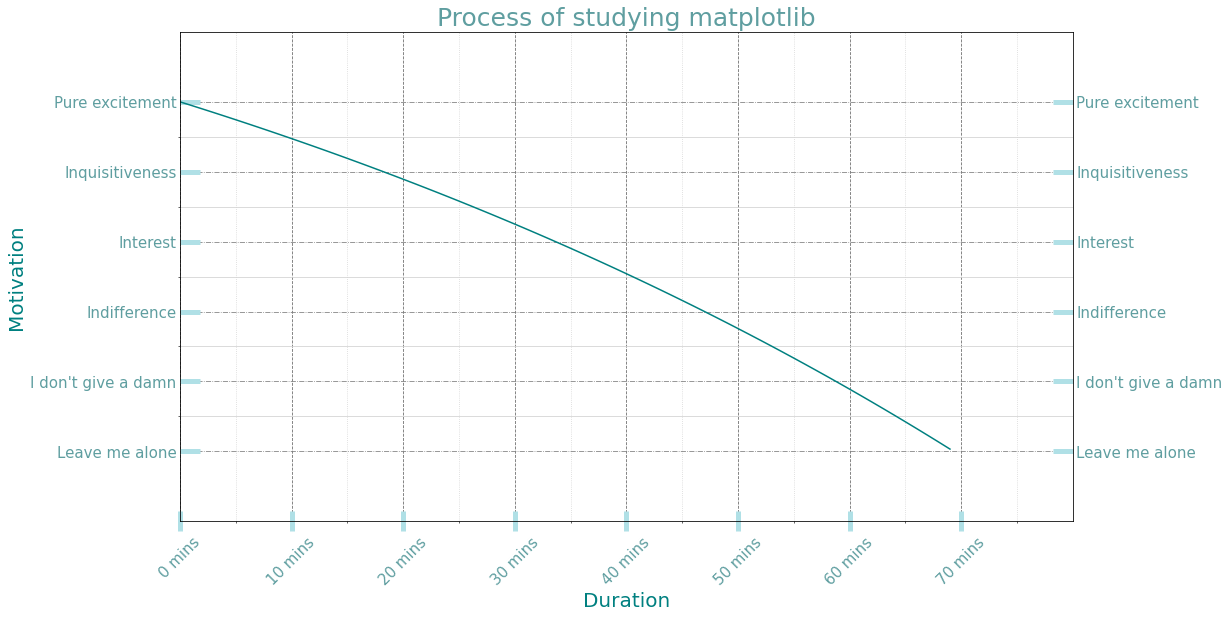

In [62]:
fig = plt.figure(figsize=(16, 9))
# Здесь мы создаем мультиокно из 1 строки и 1 столбца  выбираем 1-ю ячейку
# Такой вот странный и часто используемый способ создать область рисования
ax = fig.add_subplot(111)
ax.set_title('Process of studying matplotlib', fontsize=25, color='cadetblue')

# Здесь все как обычно - рисуем линию
ax.plot(
    np.arange(70),
    2 - np.exp(0.01 * np.arange(70)),
    color='teal'
)

# Задаем положения вспомогательных делений на оси Х
ax.set_xticks(np.arange(5, 85, 10), minor=True)
# Задаем положения основных делений
ax.set_xticks(np.arange(0, 80, 10))
# Задаем диапазон значений x который будет отрисовываться. Обынчно он шире диапазона делений
ax.set_xlim(0, 80)
# Ставим подписи к основным делениям на оси x
ax.set_xticklabels(
    ['{} mins'.format(t) for t in range(0, 80, 10)],  # текст надписей
    rotation=45,  # угол поворота надписей
    fontsize=15,
    color='cadetblue'
)
# Настраиваем параметры основных делений на оси X
ax.tick_params(
    axis='x',  
    which='major',
    direction='inout', # деления будут пересекать ось 
    length=20,  # длина делений в точках
    width=5,  # ширина делений в точках
    color='powderblue',
    top=False, bottom=True,  # рисуем делениями только снизу
    labeltop=False, labelbottom=True  # рисуем подписи к делениям только снизу
)

# Для оси Y все настройки аналогичны
ax.set_yticks(np.arange(0.1, 1, 0.2), minor=True)
ax.set_yticks(np.arange(0, 1.1, 0.2))
ax.set_ylim(-0.2, 1.2)
ax.set_yticklabels(
    ['Leave me alone', 'I don\'t give a damn', 'Indifference', 'Interest', 'Inquisitiveness', 'Pure excitement'],
    fontsize=15,
    color='cadetblue'
)
ax.tick_params(
    axis='y', which='major',
    direction='in',
    length=20, width=5, color='powderblue',
    left=True, right=True,
    labelleft=True, labelright=True
)

# Делаем подписи к осям
ax.set_xlabel('Duration', color='teal', fontsize=20)
ax.set_ylabel('Motivation', color='teal', fontsize=20)

# Для основных делений оси x мы строим координатную сетку пунктирной линией
ax.grid(True, axis='x', which='major', color='dimgrey', linestyle='--')
# Для вспомогательных делений оси x мы строим координатную сетку сплошной линией более тусклого цвета
ax.grid(True, axis='x', which='minor', color='lightgrey', linestyle=':')
# Аналогично настраиваются параметры для координатной сетки по оси Y
ax.grid(True, axis='y', which='major', color='grey', linestyle='-.')
ax.grid(True, axis='y', which='minor', color='lightgrey', linestyle='-')

plt.show()

При всем том, что ноутбук получился очень большим, мы не обсудили еще очень много тем: глобальные настройки через rcParams, работа со шрифтами, палитры, специальный дизайн шкалы на температурной карте и т.д. и т.п. Если вам понадобятся такие возможности matplotlib, то пора садиться за [серьезные книжки](http://index-of.co.uk/Tutorials/Matplotlib%20for%20Python%20Developers.pdf) или даже [читать документацию](https://matplotlib.org/index.html).

## Галерея примеров - https://matplotlib.org/gallery/index.html

## [seaborn](https://seaborn.pydata.org/index.html)

Краткий [гайд](https://nagornyy.me/it/vizualizatsiia-dannykh-v-seaborn/)

## [plotly](https://plotly.com/python/)